In [1]:
%matplotlib notebook 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def indic(x,y,z):
    if x==y or x==z:
        return 1
    else :
        return 0

In [3]:
class Flock(object):
    """Represents the N-birds configuration at a given moment, in 2D. Birds are flocking in a square of side L
    with periodic boundary conditions. Birds' positions and velocities are contained in two arrays. 
    At t=0, these are pos0 and vel0.
    Birds flock will evolve at each time-step Dt"""
    
    def __init__(self,N,L,eta,v,r, Dt, pos0, vel0):
        """we choose L as a multiple of r in order to simplify"""
        self.positions = pos0
        self.velocities = vel0
        self.a = int(L/r)
        self.checkering = [[[] for i in range(self.a)] for j in range(self.a)]
        self.eta = eta
        self.v = v
        self.r = r 
        """the interaction radius"""
        self.L = L 
        """the scale of the flock"""
        self.N = N
        self.Dt=Dt
        self.localize_birds()
        
    def localize_birds(self):
        """compute the cell of each bird from its position and actualize self.checkering"""
        self.checkering = [[[] for i in range(self.a)] for j in range(self.a)]
        for k in range (self.N):
            i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
            self.checkering[i][j].append(k)
        
    
    def compute_new_velocity(self, k):
        """compute the new velocity bird number k will adopt, according to the velocity of its neighbours.
        Neighbours are necessary contained in the cell of bird number k and the eight cells around.
        For each of these potential neighbours, we have to check if they are within a circle of radius r around bird number k
        the interaction radius"""
        i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/self.r)
        cos_avr = 0
        sin_avr = 0
        for p in range(-1,2):
            for q in range (-1,2):
                for bird in self.checkering[(i+p)%self.a][(j+q)%self.a]:
                    if (np.linalg.norm(self.positions[k]-(self.positions[bird]+np.array([indic(i+p,-1,self.a)*np.sign(i+p)*self.L, indic(i+q,-1,self.a)*np.sign(i+q)*self.L])))<self.r) : #check if birds are within a circle of radius r
                        cos_avr += self.velocities[bird,0]
                        sin_avr += self.velocities[bird,1]
        if cos_avr == 0 :
            theta=np.pi+np.sign(sin_avr)*(np.pi)/2
        else :
            theta=np.arctan(sin_avr/cos_avr)
            theta= theta +(1-np.sign(theta)*np.sign(sin_avr))*np.pi/2
        theta+=npr.uniform(-self.eta/2,self.eta/2)
        new_velocity = self.v*np.array([np.cos(theta),np.sin(theta)])
        return new_velocity
    
    def make_step(self):
        """compute the new velocities and positions that birds will get after the time-step,
        actualize self.positions, self.velocities and self.chekering"""
        new_velocities=np.zeros((self.N,2))
        new_positions=(self.positions).copy()
        for k in range(N):
            new_velocities[k]=self.compute_new_velocity(k)
            new_positions[k]+=(self.velocities[k]*self.Dt)
            new_positions[k]=new_positions[k]%self.L #%L for periodic boundary conditions
        self.positions = new_positions
        self.localize_birds()
        self.velocities=new_velocities
        
    def compute_avr_norm_velocity(self):
        """compute the average normalized velocity of birds in the flock at time t"""
        va = [0,0]
        for k in range (self.N):
            va+=self.velocities[k]
        return np.linalg.norm(va/(self.N*self.v))

<IPython.core.display.Javascript object>


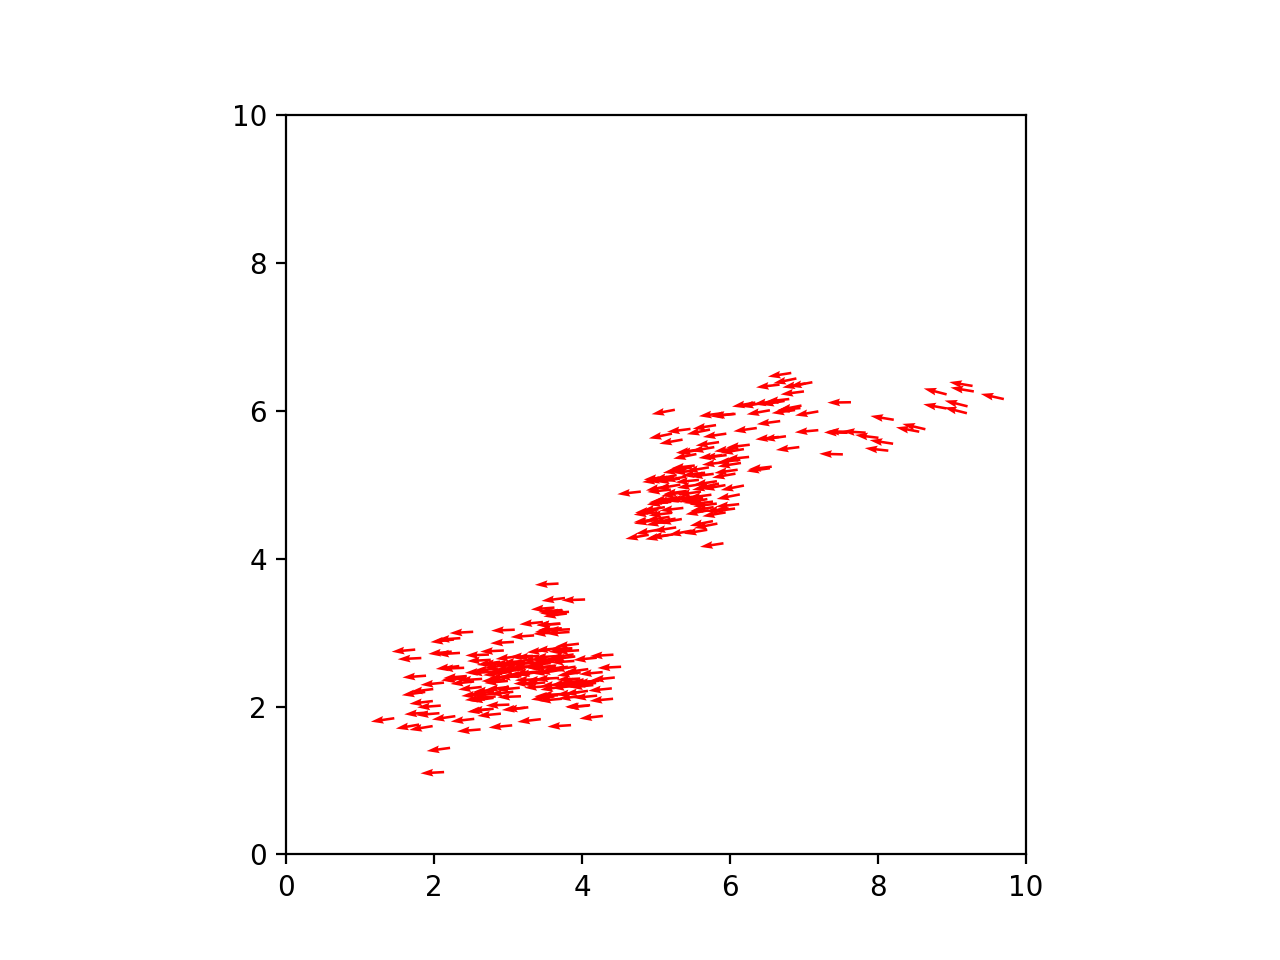

In [14]:
#animation of flocking birds 
N=300
L=10
eta=0.1
v=1
r=0.5
Dt=0.1
pos0=npr.uniform(0,L,size=(N,2))
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)

#plot within quiver 

X, Y = fl.positions[:,0], fl.positions[:,1]
U, V = fl.velocities[:,0], fl.velocities[:,1]

#fig, ax = plt.subplots(1,1)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
#line, = ax.plot([], [], 'bo', ms=5)
Q = ax.quiver(X, Y, U, V, color='r',)
ax.set_xlim(0, fl.L)
ax.set_ylim(0, fl.L)

def update_quiver(t):
        fl.make_step()
        X, Y = fl.positions[:,0], fl.positions[:,1]
        U, V = fl.velocities[:,0], fl.velocities[:,1]
        Q.set_UVC(U,V)
        Q.set_offsets(np.stack([X,Y],axis =1))
        return Q,

animation.FuncAnimation(fig, update_quiver, interval=200, blit=False)

#anim = animation.FuncAnimation(fig, update_quiver,
                               #interval=500, blit=False)
#anim.save("movie800birdsL20eta01.mp4","writer=ffmpeg")

<IPython.core.display.Javascript object>


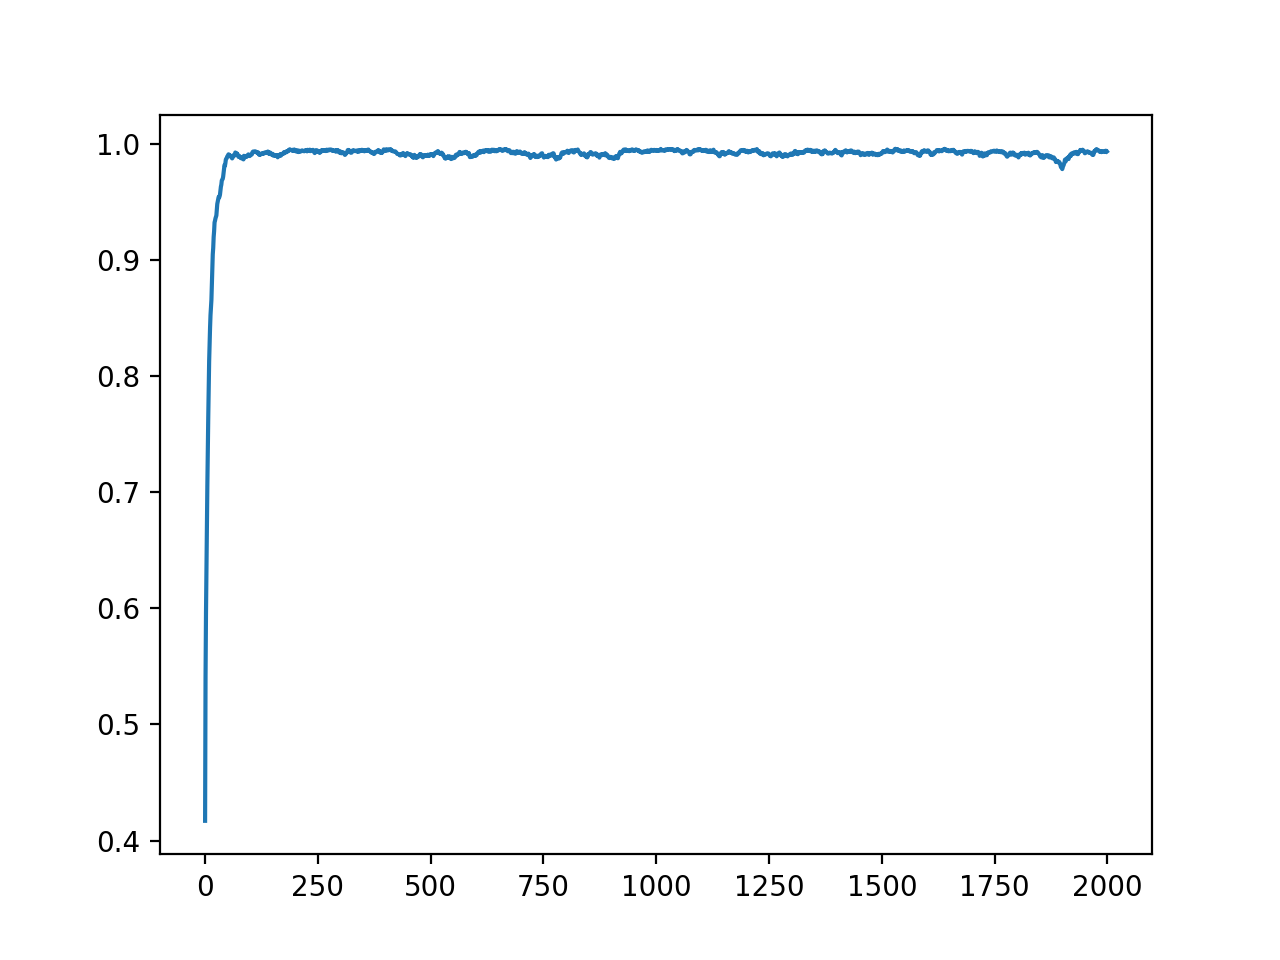

In [18]:
#normalized velocity dependance within time
N=200
L=10
eta=np.pi/10
v=0.1
r=1.
Dt=1.
pos0=npr.uniform(0,L,size=(N,2))
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl2=Flock(N,L,eta,v,r, Dt, pos0, vel0)
L=[]
T=[]
t=0
for i in range(2000):
    T.append(t)
    fl2.make_step()
    L.append(fl2.compute_avr_norm_velocity())
    t+=1

plt.figure()
plt.plot(T,L)

In [20]:
Dt=1.
v=0.1
r=1.
N=300
L=4.
eta = 0.5

def generate_random_flock(N, L, eta, v, r, Dt):
    pos0=npr.uniform(0,L,size=(N,2))
    theta = npr.uniform(0.,2*np.pi,N)
    vel0=np.zeros((N,2))
    vel0[:,0]=v*np.cos(theta)
    vel0[:,1]=v*np.sin(theta)
    fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)
    return fl

eta = np.linspace(0,3,25)
eta = eta.tolist()
eta_2= np.linspace(3,6,50)
eta_2 = eta_2.tolist()
eta+= eta_2
    
def noise_influence():
    noise_influence = open("noise_influenceL=4.txt","w")
    for et in eta:
        va = 0
        var = 0
        for n in range (10):
            fl = generate_random_flock(N, L, et, v, r, Dt)
            for k in range(150):
                fl.make_step()
            va+=fl.compute_avr_norm_velocity()
            var+=(fl.compute_avr_norm_velocity())**2
        va/=10
        sigma= np.sqrt((var/10)-(va)**2)
        noise_influence.write("\n" +str(et)+" "+str(va)+" "+str(sigma))
    noise_influence.close()  
    
#noise_influence()

"""#à mettre dans analysis
M = np.loadtxt("noise_influenceL=4.txt")
Noise = M[:,0]
V_n = M[:,1]
Sigma_n = M[:,2]
        
#à mettre dans analysis       
noise_fig = plt.figure()
plt.plot(Noise, V_n)
plt.errorbar(Noise, V_n, yerr=Sigma_n, fmt='o')
plt.title('Noise influence on v_a')
"""


'#à mettre dans analysis\nM = np.loadtxt("noise_influenceL=4.txt")\nNoise = M[:,0]\nV_n = M[:,1]\nSigma_n = M[:,2]\n        \n#à mettre dans analysis       \nnoise_fig = plt.figure()\nplt.plot(Noise, V_n)\nplt.errorbar(Noise, V_n, yerr=Sigma_n, fmt=\'o\')\nplt.title(\'Noise influence on v_a\')\n'

In [24]:
"""#order parameter dependance within N vectorized
N0= [8,10,12,14,16,20]
theta1 = [npr.uniform(0.,2*np.pi,n) for n in N0]
vel01=[np.zeros((n,2)) for n in N0]
vel01[:,0]=v*np.cos(theta1)
vel01[:,1]=v*np.sin(theta1)
flockN = [Flock(N1, L, eta, v, r, Dt, npr.uniform(0,L,size=(N1,2)), np.zeros((N1,2))) for N1 in N0]
for i in range(10):
    for fl1 in flockN:
        fl1.make_step()
avg_vel_N =[fl1.compute_avr_velocity() for fl1 in flockN]
plt.xlabel("N")
plt.ylabel("order parameter")
plt.plot(N0,avg_vel_N,color="red")
plt.savefig("order parameter dependance within density")"""

'#order parameter dependance within N vectorized\nN0= [8,10,12,14,16,20]\ntheta1 = [npr.uniform(0.,2*np.pi,n) for n in N0]\nvel01=[np.zeros((n,2)) for n in N0]\nvel01[:,0]=v*np.cos(theta1)\nvel01[:,1]=v*np.sin(theta1)\nflockN = [Flock(N1, L, eta, v, r, Dt, npr.uniform(0,L,size=(N1,2)), np.zeros((N1,2))) for N1 in N0]\nfor i in range(10):\n    for fl1 in flockN:\n        fl1.make_step()\navg_vel_N =[fl1.compute_avr_velocity() for fl1 in flockN]\nplt.xlabel("N")\nplt.ylabel("order parameter")\nplt.plot(N0,avg_vel_N,color="red")\nplt.savefig("order parameter dependance within density")'

In [ ]:
#order parameter dependance within N non vectorized
